
    1.Название работы: Сигналы телекоммуникационных систем

    2.Цель: Познакомиться со средствами генерации и визуализации простых сигналов.
    
    3.Постановка задачи:
        Промоделировать синусоидальный и прямоугольный сигналы с различными параметрами.
        Получить их спектры. Вывести на график.

    4.Теоритический раздел
        Аналитическое исследование поведения информационной системы основано на построении адекватной математической модели,отражающей характеристики элементов системы и возможные способы их взаимодействия.
        Понятие функции, как определенной зависимости величины y от величины – х, математической записью в виде у(х) позволяет применять математический аппарат функций в качестве базовой основы построения моделей технических систем.
        Функции, служащие для описания реальных сигналов, всегда вещественны.
        Понятие "сигнал" широко используется в информационных системах и обычно обозначает физический процесс, который является ма

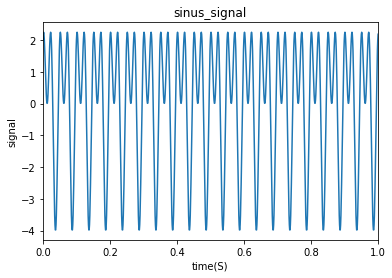

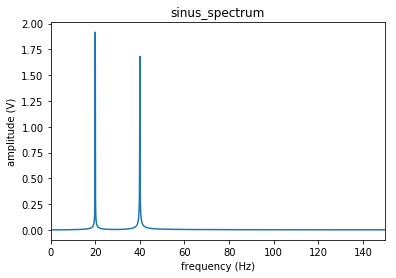

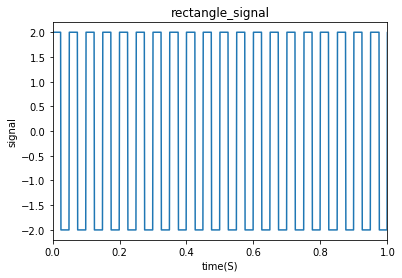

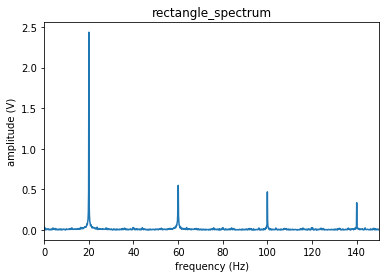

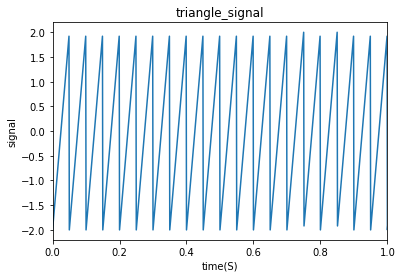

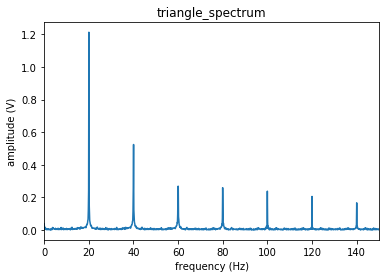


    6.Выводы
        -график sinus_spectrum демонстрирует, что исходный гармонический сигнал является суммой 2-ух гармонических сигналов с частотами 20 и 40 Hz.
        -график rectangle_spectrum демонстрирует, что исходный прямоугольный сигнал является суммой большого количества гармонических сигналов с разными частотами.
        -график triangular_spectrum демонстрирует, что исходный треугольный сигнал является сверткой 2-ух прямоугольных сигналов.
    


In [2]:
from __future__ import print_function
import sys
sys.path.append("../..") 
from Telecom.my_telecom import *


print(lab1_theory.__doc__)

print("sinus_signal %s" % get_sin_sig.__doc__)
print("rectangle_signal %s"%get_rect_sig.__doc__)
print("triangular_signal %s"%get_triang_sig.__doc__)
print("plot_graphic %s"%plot_graphic.__doc__)



# Parameters of signals
sig_freq = 20  # frequency of original signal
ampl = 2  # amplitude of original signal
fs = 1000  # sampling rate
ts = 1.0 / fs  # sampling interval
n = 1 << 13  # number of fft points, pick power of 2

t = np.arange(0, n * ts, step=ts)  # time vector
signals = \
    [
        get_sin_sig(t, sig_freq, ampl),
        get_rect_sig(t, sig_freq, ampl),
        get_triang_sig(t, sig_freq, ampl)
    ]

# Parameters for graphics
functions_names = ['sinus_', 'rectangle_', 'triangle_']
show = True
save = not show

# Spectrum calculating and plotting
for sig, title in zip(signals, functions_names):
    fft_freq = np.fft.fftfreq(n, ts)  # discrete Fourier Transform frequencies

    sig_fft = np.fft.fft(sig) / n * 2  # discrete Fourier Transform ( / n * 2 - normalization)

    # [:(n - 1) / 2], because second half it's mirror image of first half
    plot_graphic(
        x=t[:int((n - 1) / 2)], y=sig[:int((n - 1) / 2)],
        title=title + 'signal',
        x_label='time(S)', y_label='signal',
        xlim=[0, 1],
        show=show, save=save
    )

    plot_graphic(
        x=fft_freq[:int((n - 1) / 2)], y=abs(sig_fft)[:int((n - 1) / 2)],
        title=title + 'spectrum',
        x_label='frequency (Hz)', y_label='amplitude (V)',
        xlim=[0, 150],
        show=show, save=save
    )

    
    
    
    

print(lab1_conclusion.__doc__)
